In [1]:
using LsqFit
using Plots
using JLD

Load the jld data file from the output of analysis.jl

In [2]:
# Redefining the types from simulation.jl so that data can be loaded properly

mutable struct SimulationData
    step::Int32
    clusters::Int32
    size::Vector{Int32}
    gyr::Vector{Float64}
end

mutable struct EnsembleData
    mrna_ang::Float64
    n_lip::Int32
    sim_data::Array{SimulationData}
end

In [3]:
# edit the name of the data file here
d = load("../data/angular_coverage_test.jld");

dataset = d["data"];

┌ Warning: type Main.test_angular_coverage.EnsembleData not present in workspace; interpreting array as Array{Any}
└ @ JLD C:\Users\alenz\.julia\packages\JLD\S6t6A\src\JLD.jl:515
┌ Warning: type Main.test_angular_coverage.EnsembleData not present in workspace; reconstructing
└ @ JLD C:\Users\alenz\.julia\packages\JLD\S6t6A\src\jld_types.jl:697
┌ Warning: type Main.test_angular_coverage.SimulationData not present in workspace; interpreting array as Array{Any}
└ @ JLD C:\Users\alenz\.julia\packages\JLD\S6t6A\src\JLD.jl:515
┌ Warning: type Main.test_angular_coverage.SimulationData not present in workspace; reconstructing
└ @ JLD C:\Users\alenz\.julia\packages\JLD\S6t6A\src\jld_types.jl:697
┌ Warning: type Main.test_angular_coverage.SimulationData not present in workspace; interpreting array as Array{Any}
└ @ JLD C:\Users\alenz\.julia\packages\JLD\S6t6A\src\JLD.jl:515
┌ Warning: type Main.test_angular_coverage.SimulationData not present in workspace; interpreting array as Array{Any}
└ @ JL

Set the following parameters to exactly what was used to generate the data

In [4]:
angs = collect(0:10:360) .* pi ./ 180;
n_Tests = length(angs);
n_lip = 125;
iter = 20;
skip = 43;
n_steps = 1288;

In [5]:
step_vals = collect(1.0:skip:n_steps) # array of time step_vals
tot_lip = iter * n_lip # total number of liposomes
f_T(t, p) = p[1] .* t .+ 1
fit_ps = [] # array to hold growth rates
init_p = [rand()] # random initial parameter value when fitting

for test in 1:n_Tests
        # calculate average cluster size at each step and store it
    av_cluster_size_at_step = similar(step_vals)
    for step_index in 1:length(step_vals)
        data_at_step = dataset[test].sim_data[step_index] 
        av_cluster_size_at_step[step_index] = tot_lip/(tot_lip - sum(data_at_step.size) + data_at_step.clusters)
    end
    # fit the average cluster size to get the growth rate
    fit = curve_fit(f_T, step_vals, av_cluster_size_at_step, init_p)
    # store the growth rates
    push!(fit_ps, fit.param)
end

# final data for plotting
angular_coverages = Int.(round.(angs .* 180 ./ pi));
growth_rates = reduce(hcat, fit_ps)'[:, 1];

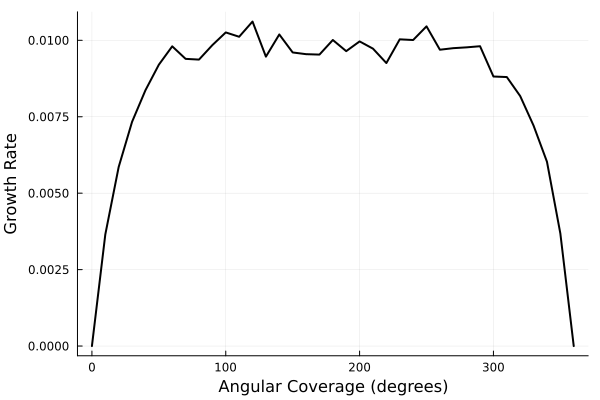

In [6]:
plot(angular_coverages, growth_rates, xlabel = "Angular Coverage (degrees)", ylabel = "Growth Rate", legend = false, c = :black, lw = 2, dpi = 300)
#savefig(joinpath(@__DIR__, "..\\figures\\growth_rate_vs_angular_coverage_black.png"))